In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Get data

In [11]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-12-25 15:40:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   261MB/s    in 0.6s    

2024-12-25 15:40:02 (261 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [12]:
import zipfile

In [13]:
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [14]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"there are {len(dirnames)} dirrctories and {len(filenames)} images in {dirpath}")

there are 2 dirrctories and 0 images in 10_food_classes_10_percent
there are 10 dirrctories and 0 images in 10_food_classes_10_percent/train
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/ramen
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/grilled_salmon
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/chicken_wings
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/pizza
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/fried_rice
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/sushi
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/steak
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/ice_cream
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/chicken_curry
there are 0 dirrctories and 75 images in 10_food_classes_10_percent/train/hamburger
there are 10 dirrctor

# Prepare Data

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32


train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


train_10_percent = train_datagen.flow_from_directory( directory = train_dir, target_size = IMAGE_SHAPE, shuffle = True, class_mode = "categorical")
test_10_percent = test_datagen.flow_from_directory( directory = test_dir, target_size = IMAGE_SHAPE, shuffle = False, class_mode = "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Create Tensorboard Callback

In [17]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving tensorboard log files to: {log_dir}")
  return tensorboard_callback

# Creating Model Using Tensorflow Hub

In [38]:
efficient_net = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

In [19]:
resnet = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Creating Function to create model from tensorflow hub

In [64]:
pip install tensorflow==2.15.0, tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

Downgraded to 2.15 from 2.17, Beacuse of this error - "Only instances of `keras.Layer` can be added to a Sequential model"

In [21]:
print("TensorFlow Version :", tf.__version__)

TensorFlow Version : 2.15.0


In [22]:
!pip install tf_keras -q

In [61]:
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False, # Freeze the already learned pattern
                                           name = "Feature_extractor_Layer",
                                           input_shape = IMAGE_SHAPE + (3,),
                                           )
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = "softmax", name = "output_layer")
  ])
  return model

In [62]:
## Creating ResNet model

In [25]:
resnet_model = create_model(resnet, num_classes = train_10_percent.num_classes)

In [29]:
resnet_model.compile(loss = "categorical_crossentropy",
                      optimizer = "Adam",
                      metrics = ["accuracy"])

In [30]:
history_resnet = resnet_model.fit(train_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_10_percent),
                                  validation_data = test_10_percent,
                                  validation_steps = len(test_10_percent),
                                  callbacks= [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name = "resnet50v2")])

Saving tensorboard log files to: tensorflow_hub/resnet50v2/20241225-155338
Epoch 1/5
24/24 [==============================] - 545s 23s/step - loss: 2.1229 - accuracy: 0.3133 - val_loss: 1.3234 - val_accuracy: 0.5772
Epoch 2/5
24/24 [==============================] - 543s 23s/step - loss: 0.9787 - accuracy: 0.7040 - val_loss: 0.8955 - val_accuracy: 0.7120
Epoch 3/5
24/24 [==============================] - 566s 24s/step - loss: 0.6622 - accuracy: 0.8040 - val_loss: 0.7804 - val_accuracy: 0.7476
Epoch 4/5
24/24 [==============================] - 627s 27s/step - loss: 0.5105 - accuracy: 0.8587 - val_loss: 0.7058 - val_accuracy: 0.7724
Epoch 5/5
24/24 [==============================] - 531s 23s/step - loss: 0.4005 - accuracy: 0.9067 - val_loss: 0.6806 - val_accuracy: 0.7812


In [31]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extractor_Layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [34]:
import matplotlib.pyplot as plt

In [35]:
def plot_loss_curves(history):
  loss= history.history["loss"]
  epoch = range(len(history.history["loss"]))
  validation_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  validation_accuracy = history.history["val_accuracy"]

  plt.figure(figsize = (15,5))
  plt.subplot(1,2,1)
  plt.plot(epoch, loss, label = "Train_loss")
  plt.plot(epoch,validation_loss, label ="Validation_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)

  plt.plot(epoch, accuracy, label = "Train_accuracy")
  plt.plot(epoch,validation_accuracy, label ="Validation_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()




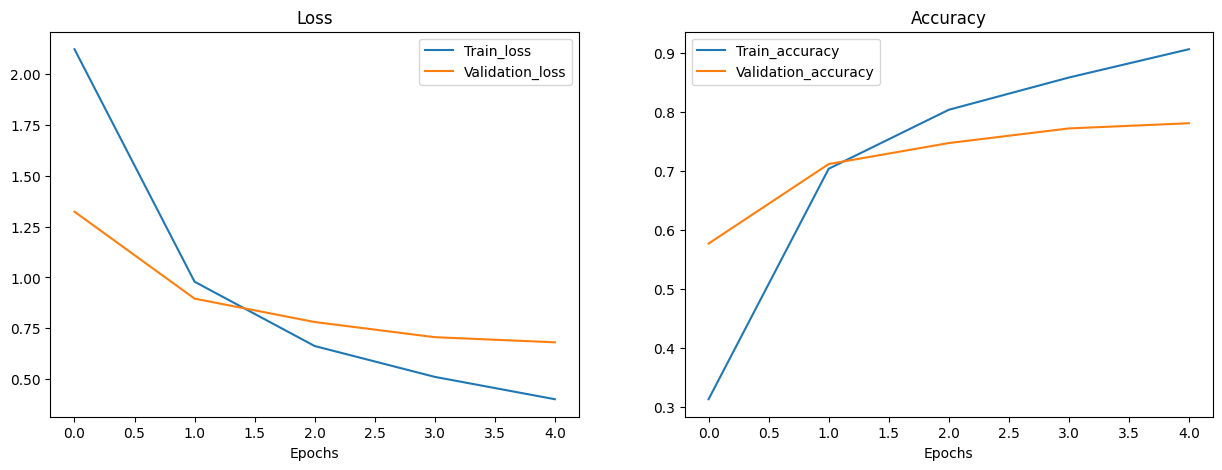

In [36]:
plot_loss_curves(history_resnet)

In [63]:
efficient_net_model = create_model(efficient_net, num_classes = train_10_percent.num_classes)

In [42]:
efficient_net_model.compile(loss ="categorical_crossentropy",
                            optimizer = "Adam",
                            metrics = ["accuracy"])

In [41]:
history_efficient = efficient_net_model.fit(train_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_10_percent),
                                  validation_data = test_10_percent,
                                  validation_steps = len(test_10_percent),
                                  callbacks= [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name = "resnet50v2")])

Saving tensorboard log files to: tensorflow_hub/resnet50v2/20241225-171142
Epoch 1/5
24/24 [==============================] - 255s 10s/step - loss: 1.8197 - accuracy: 0.4240 - val_loss: 1.3045 - val_accuracy: 0.7224
Epoch 2/5
24/24 [==============================] - 239s 10s/step - loss: 1.0464 - accuracy: 0.7720 - val_loss: 0.8729 - val_accuracy: 0.8100
Epoch 3/5
24/24 [==============================] - 242s 10s/step - loss: 0.7420 - accuracy: 0.8307 - val_loss: 0.6971 - val_accuracy: 0.8392
Epoch 4/5
24/24 [==============================] - 239s 10s/step - loss: 0.5984 - accuracy: 0.8680 - val_loss: 0.6128 - val_accuracy: 0.8508
Epoch 5/5
24/24 [==============================] - 243s 10s/step - loss: 0.5087 - accuracy: 0.8867 - val_loss: 0.5599 - val_accuracy: 0.8600


In [48]:
efficient_net_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extractor_Layer (K  (None, 1280)              4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [49]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extractor_Layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


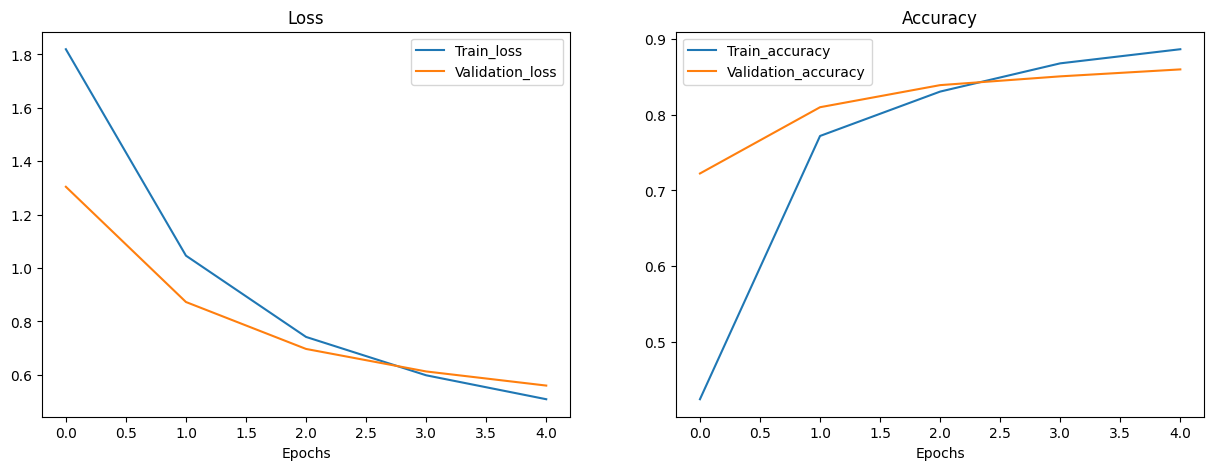

In [47]:
plot_loss_curves(history_efficient)

In [52]:
len(efficient_net_model.layers[0].weights)

309

# Comparing model results using TensorBoard

In [53]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "Eff vs Resnest" \
  --description "Comparing two different TF Hub feature extraction models" \
  --one_shot



2024-12-25 20:15:50.305907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-25 20:15:50.306126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-25 20:15:50.321437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 20:15:52.870942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

In [65]:
mobilenet_v2= "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/1"

In [66]:
modelnet = create_model(mobilenet_v2, num_classes = train_10_percent.num_classes)

In [67]:
modelnet.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_extractor_Layer (K  (None, 1280)              2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [68]:
modelnet.compile(loss ="categorical_crossentropy",
                            optimizer = "Adam",
                            metrics = ["accuracy"])

In [69]:
modelnet_history = modelnet.fit(train_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_10_percent),
                                  validation_data = test_10_percent,
                                  validation_steps = len(test_10_percent),
                                  callbacks= [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name = "modelnet")])

Saving tensorboard log files to: tensorflow_hub/modelnet/20241225-204215
Epoch 1/5
24/24 [==============================] - 177s 7s/step - loss: 1.9699 - accuracy: 0.3453 - val_loss: 1.2969 - val_accuracy: 0.6312
Epoch 2/5
24/24 [==============================] - 124s 5s/step - loss: 1.0374 - accuracy: 0.7107 - val_loss: 0.8654 - val_accuracy: 0.7556
Epoch 3/5
24/24 [==============================] - 171s 7s/step - loss: 0.7284 - accuracy: 0.8027 - val_loss: 0.7299 - val_accuracy: 0.7852
Epoch 4/5
24/24 [==============================] - 123s 5s/step - loss: 0.5810 - accuracy: 0.8547 - val_loss: 0.6825 - val_accuracy: 0.7892
Epoch 5/5
24/24 [==============================] - 171s 7s/step - loss: 0.4843 - accuracy: 0.8920 - val_loss: 0.6311 - val_accuracy: 0.8084


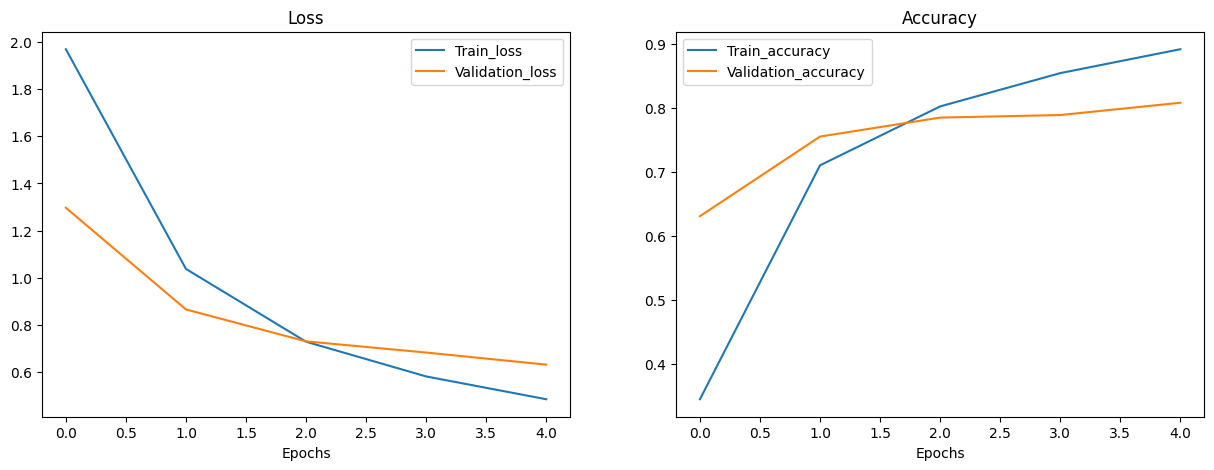

In [70]:
plot_loss_curves(modelnet_history)

In [107]:
from google.colab import files
upload = files.upload()

Saving training_data.zip to training_data.zip


In [108]:
import zipfile
zip_ref = zipfile.ZipFile("training_data.zip")
zip_ref.extractall()
zip_ref.close()

In [110]:
import os
for dirpath, dirnames,filenames in os.walk("training_data"):
  print(f"There are {len(dirnames)} directory and {dirpath}  images in {filenames}")

There are 2 directory and training_data  images in []
There are 0 directory and training_data/Ipad  images in ['WhatsApp Image 2024-12-25 at 4.40.25 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.29 PM (1).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.27 PM (1).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.26 PM (1).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.29 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.27 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.26 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.25 PM (1).jpeg']
There are 0 directory and training_data/laptop  images in ['WhatsApp Image 2024-12-25 at 4.40.30 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.30 PM (1).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.31 PM (2).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.31 PM (1).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.34 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.33 PM (1).jpeg', 'WhatsApp Image 2024-12-25 at 4.40.33 PM.jpeg', 'WhatsApp Image 2024-12-25 at 4.40.31 PM.jpeg']


In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [118]:
train_dir = "/content/training_data"

train_datagen= ImageDataGenerator(rescale = 1/255.,
                                  rotation_range = 1,
                                  zoom_range= 1)

train_data_local = train_datagen.flow_from_directory(directory = train_dir, target_size = IMAGE_SHAPE, class_mode = "binary", shuffle = True)



Found 16 images belonging to 2 classes.


In [123]:
train_data_local.class_indices

{'Ipad': 0, 'laptop': 1}

In [ ]:
model_url =

In [124]:
feature_extractor_layer = hub.KerasLayer(efficient_net,
                                           trainable = False, # Freeze the already learned pattern
                                           name = "Feature_extractor_Layer",
                                           input_shape = IMAGE_SHAPE + (3,),
                                           )
model_local = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
  ])

In [126]:
model_local.compile(loss = "binary_crossentropy",
                      optimizer = "Adam",
                      metrics = ["accuracy"])

In [129]:
history_local = model_local.fit(train_data_local,
                                  epochs = 10,
                                  steps_per_epoch = len(train_data_local))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.4837 - accuracy: 0.8125
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.5172 - accuracy: 0.8750
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.4546 - accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.5114 - accuracy: 0.8750
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.4980 - accuracy: 0.8125
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.3843 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.4069 - accuracy: 0.8750
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.4322 - accuracy: 0.8750
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.3020 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.3040 - accuracy: 1.0000


In [137]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [138]:
data_dir = pathlib.Path("/content/training_data")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['Ipad' 'laptop']


In [130]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.0
  return img

In [131]:
test_1 = load_and_prep_image("/download (1).jpg")

In [132]:
test_1.shape

TensorShape([224, 224, 3])

In [140]:
def pred_and_plot(file_name, model):

  img = load_and_prep_image(file_name)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 82ms/step


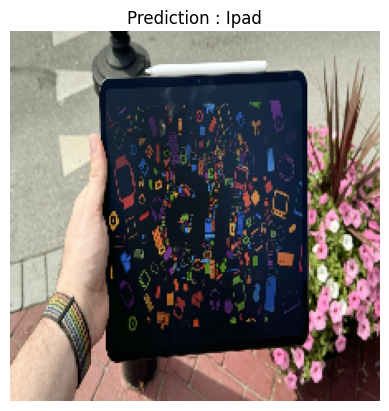

In [144]:
pred_and_plot("/0-125206-13-inch-iPad-Pro-12-xl.jpg", model_local)